In [34]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

In [12]:
df = pd.read_csv('../data/input/Telecom_customer churn.csv')
print('データ数は{}、変数は{}種類です'.format(df.shape[0], df.shape[1]))

データ数は100000、変数は100種類です


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

|  カラム名  |  内容  | 日本語訳 | データの種類 |
| ---- | ---- | --- | --- |
|  rev_Mean  |  Mean monthly revenue (charge amount)  | 平均月間課金額 | サービス利用データ | 
|  mou_Mean  |  Mean number of monthly minutes of use  | 平均月間使用時間（分） | サービス利用データ | 
|  totmrc_Mean  |  Mean total monthly recurring charge  | 毎月発生する料金（月毎） rev_Meanとの違いは？ |　サービス利用データ | 
|  da_Mean  |  Mean number of directory assisted calls  | 電話番号案内の平均利用回数 | サービス利用データ | 
|  ovrmou_Mean  |  Mean overage minutes of use  | 平均超過使用時間（分）（ovrrer_Meanとvceovr_Meanの合計) | サービス利用データ | 
|  ovrrev_Mean  |  Mean overage revenue  | 超過収益の平均額 | サービス利用データ | 
|  vceovr_Mean  |  Mean revenue of voice overage  | 音声超過料金の平均額 | サービス利用データ | 
|  datovr_Mean  |  Mean revenue of data overage  | データ超過料金の平均額 | サービス利用データ | 
|  roam_Mean  |  Mean number of roaming calls  | ローミング通話の回数 | サービス利用データ | 
|  change_mou  |  Percentage change in monthly minutes of use vs previous three month average  | 対前3ヶ月との月間使用時間の変化率 | サービス利用データ | 
|  change_rev  |  Percentage change in monthly revenue vs previous three month average  | 対前3ヶ月との月間売上高の変化率 | サービス利用データ | 
|  drop_vce_Mean  |  Mean number of dropped (failed) voice calls  | 音声通話の平均失敗回数 | サービス利用データ | 
|  drop_dat_Mean  |  Mean number of dropped (failed) data calls  | データコールの平均失敗回数 | サービス利用データ | 
|  blck_vce_Mean  |  Mean number of blocked (failed) voice calls  | 音声通話のブロックの平均回数 | サービス利用データ | 
|  blck_dat_Mean  |  Mean number of blocked (failed) data calls  | データコールのブロックの平均回数 | サービス利用データ | 
|  unan_vce_Mean  |  Mean number of unanswered voice calls  | 音声通話の未受信の平均回数 | サービス利用データ | 
|  unan_dat_Mean  |  Mean number of unanswered data calls  | データコールの未受信の平均回数 | サービス利用データ | 
|  plcd_vce_Mean  |  Mean number of attempted voice calls placed  | 音声通話の平均試行回数 | サービス利用データ | 
|  plcd_dat_Mean  |  Mean number of attempted data calls placed  | データ通信の平均試行回数 | サービス利用データ | 
|  recv_vce_Mean  |  Mean number of received voice calls  | 音声通信の平均受信回数 | サービス利用データ | 
|  recv_sms_Mean  |  NaN  | なし | サービス利用データ | 
|  comp_vce_Mean  |  Mean number of completed voice calls  | 完了した音声通話の平均回数 | サービス利用データ | 
|  comp_dat_Mean  |  Mean number of completed data calls  | 完了したデータ通信の平均回数 | サービス利用データ | 
|  custcare_Mean  |  Mean number of customer care calls  | カスタマーコールの平均 | サービス利用データ | 
|  ccrndmou_Mean  |  Mean rounded minutes of use of customer care calls  | カスタマーケアコールの平均利用時間（四捨五入した分) | サービス利用データ | 
|  cc_mou_Mean  |  Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls  | カスタマーケア通話の平均利用時間 | サービス利用データ | 
|  inonemin_Mean  |  Mean number of inbound calls less than one minute  | 1分未満の着信の平均回数 | サービス利用データ | 
|  threeway_Mean  |  Mean number of three way calls  | 三者間通話平均回数 | サービス利用データ | 
|  mou_cvce_Mean  |  Mean unrounded minutes of use of completed voice calls  | 音声通話の平均利用時間 | サービス利用データ | 
|  mou_cdat_Mean  |  Mean unrounded minutes of use of completed data calls  | データ通信の平均利用時間 | サービス利用データ | 
|  mou_rvce_Mean  |  Mean unrounded minutes of use of received voice calls  | 受信した音声電話の平均時間 | サービス利用データ | 
|  owylis_vce_Mean  |  Mean number of outbound wireless to wireless voice calls  | 無線発信音声の平均通話回数 | サービス利用データ | 
|  mouowylisv_Mean  |  Mean unrounded minutes of use of outbound wireless to wireless voice calls  |  無線対無線音声通話（送信）の平均使用時間(分） | サービス利用データ | 
|  iwylis_vce_Mean  |  NaN  | なし | サービス利用データ | 
|  mouiwylisv_Mean  |  Mean unrounded minutes of use of inbound wireless to wireless voice calls  | 無線対無線音声電話（受信）の平均使用時間（分)| サービス利用データ | 
|  peak_vce_Mean  |  Mean number of inbound and outbound peak voice calls  | ピーク時の音声通信数（受信及び送信） | サービス利用データ | 
|  peak_dat_Mean  |  Mean number of peak data calls  | ピークのデータ通信の平均数 | | サービス利用データ | サービス利用データ |
|  mou_peav_Mean  |  Mean unrounded minutes of use of peak voice calls  | ピークの音声通信の平均時間（分） | サービス利用データ | 
|  mou_pead_Mean  |  Mean unrounded minutes of use of peak data calls  | ピークのデータ通信の平均時間（分） | サービス利用データ | 
|  opk_vce_Mean  |  Mean number of off-peak voice calls  | ピーク時以外の音声通話の平均回数 | サービス利用データ | 
|  opk_dat_Mean  |  Mean number of off-peak data calls  | ピーク時以外のデータ通信の平均回数 | サービス利用データ | 
|  mou_opkv_Mean  |  Mean unrounded minutes of use of off-peak voice calls  | ピーク時以外の音声通話の平均使用時間（分) | サービス利用データ | 
|  mou_opkd_Mean  |  Mean unrounded minutes of use of off-peak data calls  | ピーク時以外のデータ通信の平均使用時間（分) | サービス利用データ | 
|  drop_blk_Mean  |  Mean number of dropped or blocked calls  | 通話を切断またはブロックした平均回数 | サービス利用データ | 
|  attempt_Mean  |  Mean number of attempted calls  | 通話の試行回数 | サービス利用データ | 
|  complete_Mean  |  Mean number of completed calls  | 完了した通話の回数 | サービス利用データ | 
|  callfwdv_Mean  |  Mean number of call forwarding calls  | 転送した電話の回数 | サービス利用データ | 
|  callwait_Mean  |  Mean number of call waiting calls  | 通話待ちの平均回数 | サービス利用データ | 
|  churn  |  Instance of churn between 31-60 days after observation date  | 観測日から31日 ~ 60日の間に解約が発生した事例 | サービス利用データ | 
|  months  |  Total number of months in service  | サービス開始からの総月数 | サービス利用データ | 
|  uniqsubs  |  Number of unique subscribers in the household  | 世帯内のユニークな契約者数 | 顧客層データ | 
|  actvsubs  |  Number of active subscribers in household  | 世帯ない有効加入数 | 顧客層データ | 
|  new_cell  |  New cell phone user  | 新しい携帯のユーザー | 顧客層データ | 
|  crclscod  |  Credit class code  | クレジットクラスコード | 顧客層データ | 
|  asl_flag  |  Account spending limit  | アカウントの使用限度額 | サービス利用データ | 
|  totcalls  |  Total number of calls over the life of the customer  | 顧客生涯の総通話回数 | サービス利用データ | 
|  totmou  |  Total minutes of use over the life of the customer  | 顧客生涯の総利用時間 | サービス利用データ |
|  totrev  |  Total revenue  | 総収入 | 顧客層データ | 
|  adjrev  |  Billing adjusted total revenue over the life of the customer  | 課金で確保された顧客の生涯課金額 | サービス利用データ |
|  adjmou  |  Billing adjusted total minutes of use over the life of the customer  | 顧客生涯の課金時間 | サービス利用データ |
|  adjqty  |  Billing adjusted total number of calls over the life of the customer  | 課金後の通話の総件数（顧客生涯ベース) | サービス利用データ |
|  avgrev  |  Average monthly revenue over the life of the customer  | 顧客生涯の平均課金がく |  サービス利用データ |
|  avgmou  |  Average monthly minutes of use over the life of the customer  | 顧客生涯の平均月間利用時間 | サービス利用データ |
|  avgqty  |  Average monthly number of calls over the life of the customer  | 顧客生涯の平均月間通話回数 | サービス利用データ |
|  avg3mou  |  Average monthly minutes of use over the previous three months  | 過去3ヶ月間の平均月間利用時間 | サービス利用データ |
|  avg3qty  |  Average monthly number of calls over the previous three months  | 過去3ヶ月間の平均月間通話回数 | サービス利用データ |
|  avg3rev  |  Average monthly revenue over the previous three months  | 過去3ヶ月間の平均月間売上高 | サービス利用データ |
|  avg6mou  |  Average monthly minutes of use over the previous six months  | 過去6ヶ月間の平均月間利用時間 | サービス利用データ |
|  avg6qty  |  Average monthly number of calls over the previous six months  | 過去6ヶ月間の平均月間通話回数 | サービス利用データ |
|  avg6rev  |  Average monthly revenue over the previous six months  | 過去6ヶ月間の平均月間売上高 | サービス利用データ |
|  prizm_social_one  |  Social group letter only  | ソーシャルグループの文字列のみ | 顧客層データ | 
|  area  |  Geogrpahic area  | 地理的なエリア | 顧客層データ | 
|  dualband  |  Dualband  | デュアルバンド | ？ | 
|  refurb_new  |  Handset: refurbished or new  | 改装品か新品か | 顧客層データ | 
|  hnd_price  |  Current handset price  | 現在の携帯電話の価格 | 顧客層データ | 
|  phones  |  Number of handsets issued  | 携帯電話発行台数 | 顧客層データ | 
|  models  |  Number of models issued  | 発行されたモデル回数 | 顧客層データ | 
|  hnd_webcap  |  Handset web capability  | ハンドセットweb機能 | 顧客層データ | 
|  truck  |  Truck indicator  | トラックインジケータ | ？ | 
|  rv  |  RV indicator  | RVインジケーター | ? |
|  ownrent  |  Home owner/renter status  | 持ち家、賃貸の有無 |  顧客層データ | 
|  lor  |  Length of residence  | 居住年収 |  顧客層データ | 
|  dwlltype  |  Dwelling Unit type  | 住居の種類 |  顧客層データ | 
|  marital  |  Marital Status  | 配偶者の有無 |  顧客層データ | 
|  adults  |  Number of adults in household  | 世帯の大人の人数 |  顧客層データ | 
|  infobase  |  InfoBase match  | インフォベースに一致する | ? |
|  income  |  Estimated income  | 収入見込み | 顧客層データ | 
|  numbcars  |  Known number of vehicles  | 車の数 | 顧客層データ | 
|  HHstatin  |  Premier household status indicator  | プレミア世帯ステータス指標 | 顧客層データ | 
|  dwllsize  |  Dwelling size  | 住居の広さ | 顧客層データ | 
|  forgntvl  |  Foreign travel dummy variable  | 海外旅行ダミー変数 | 顧客層データ | 
|  ethnic  |  Ethnicity roll-up code  | 民族 | 顧客層データ | 
|  kid0_2  |  Child 0 - 2 years of age in household  | 世帯にいる0~2歳の子供 | 顧客層データ | 
|  kid3_5  |  Child 3 - 5 years of age in household  | 世帯にいる3~5歳の子供 | 顧客層データ | 
|  kid6_10  |  Child 6 - 10 years of age in household  | 世帯にいる6~10歳の子供 | 顧客層データ | 
|  kid11_15  |  Child 11 - 15 years of age in household  | 世帯にいる11~15歳の子供 | 顧客層データ | 
|  kid16_17  |  Child 16 - 17 years of age in household  | 世帯にいる16~17歳の子供 | 顧客層データ | 
|  creditcd  |  Credit card indicator  | クレジットカードの指標 | 顧客層データ | 
|  eqpdays  |  Number of days (age) of current equipment  | 現在の機器の年数 | ? |
|  Customer_ID  |  NaN  | なし | ? |

In [14]:
df['dif_rev_totmrc'] = df['rev_Mean'] - df['totmrc_Mean']

In [15]:
df.drop("Customer_ID", axis=1, inplace=True)

In [16]:
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [17]:
columns_categories(df)

object( 21 ):
 ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 9 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']
float( 70 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav

### カテゴリカル変数

In [18]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

/Users/matsumotoikuya/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matsumotoikuya/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matsumotoikuya/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

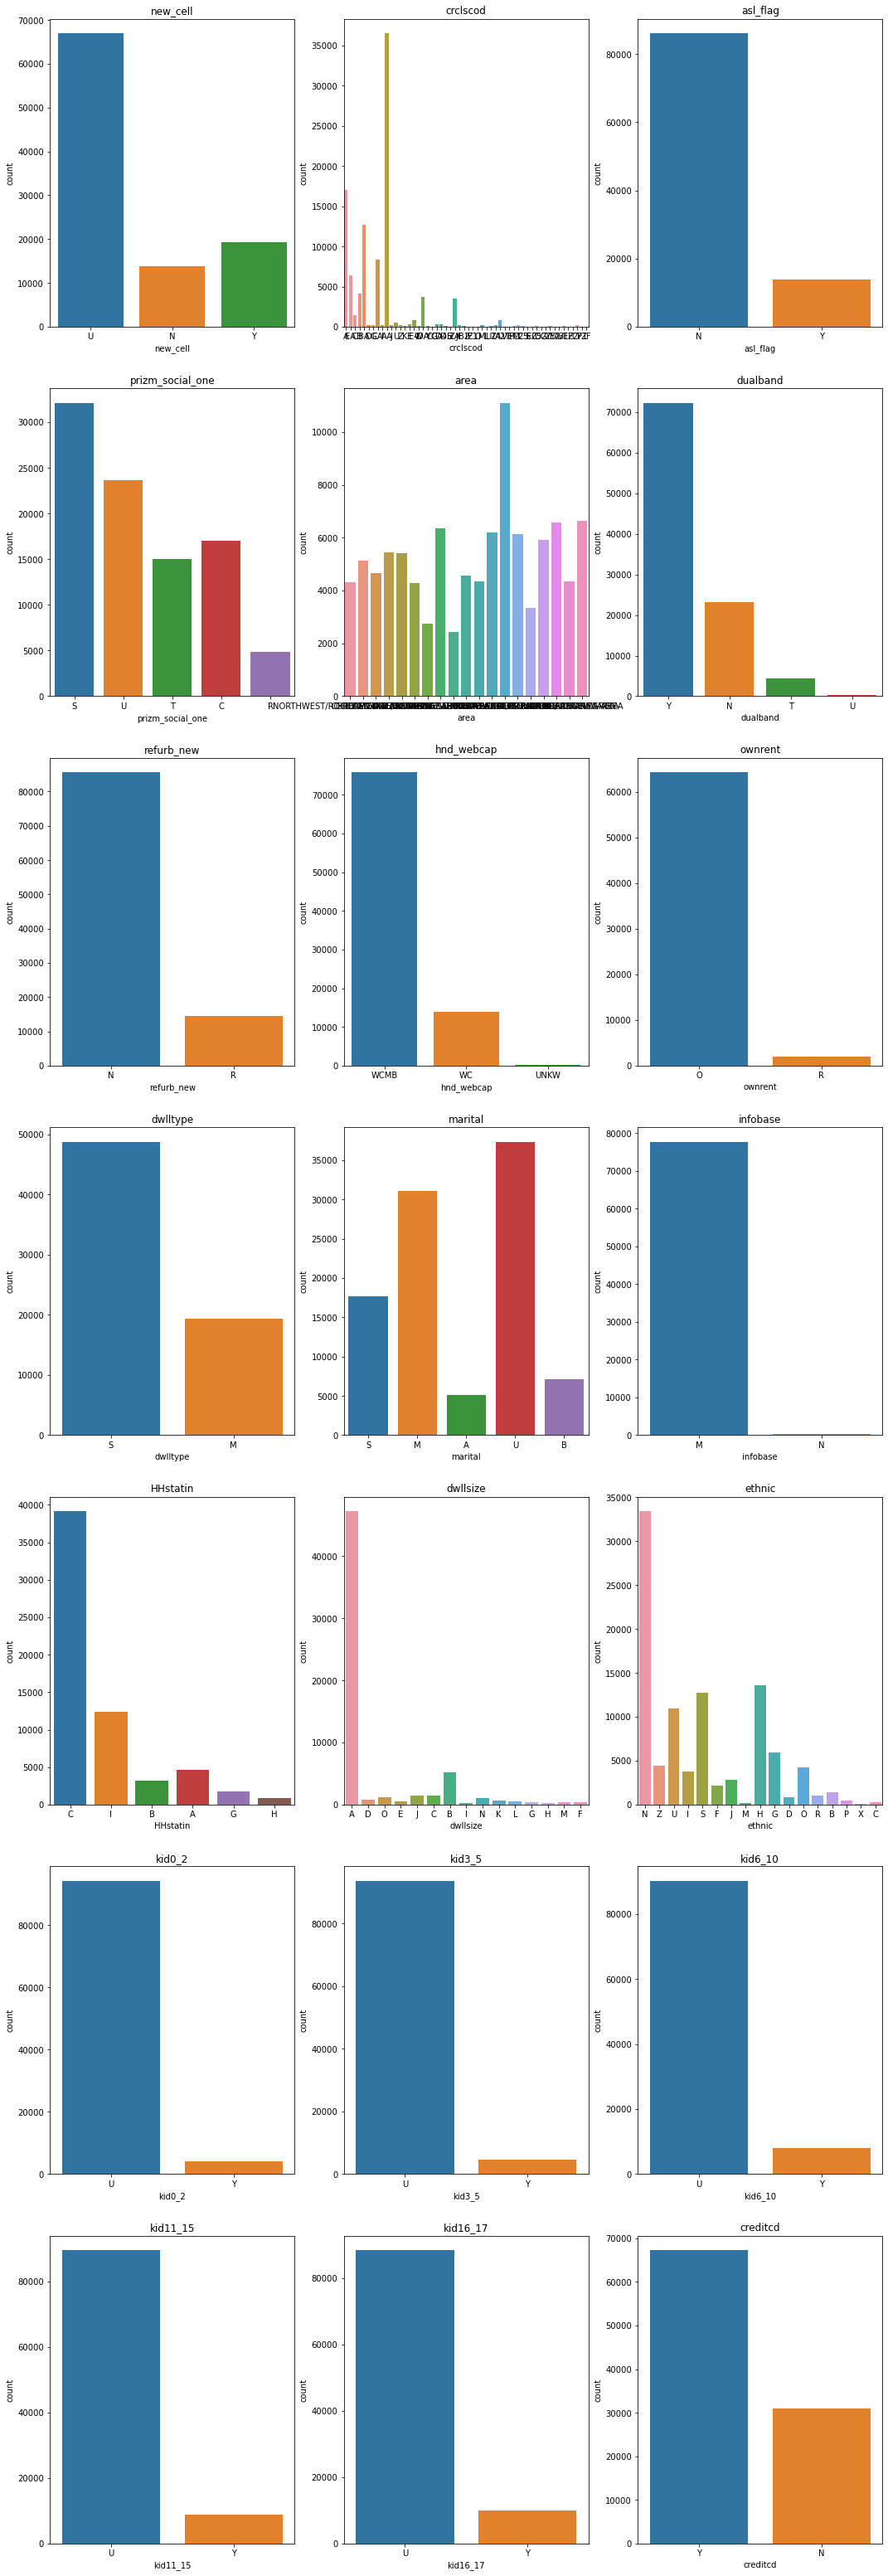

In [19]:
# cols = df.columns[df.dtypes.values == "object"]
f,ax=plt.subplots(7,3,figsize=(18,56))
for i in range(21):
  nrow = i//3
  ncol = i%3
  sns.countplot(obj_col[i], data=df, ax=ax[nrow, ncol])
  ax[nrow, ncol].set_title(obj_col[i])
plt.show()

### ベーシックデータ分析

In [20]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 50326
num of pepole who churn: 49317


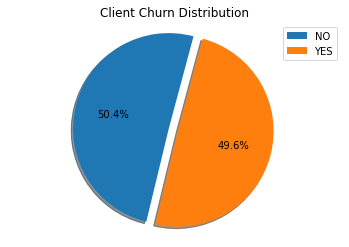

In [21]:
# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

### 欠損値処理

In [22]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [23]:
# We dropped the columns that seem to have no significant contribution to the model.
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [24]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())

In [25]:
df.dropna(inplace=True)

In [26]:
sum(df.isnull().sum()>0)

0

In [27]:
columns_categories(df)

object( 14 ):
 ['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 9 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']
float( 66 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 

In [29]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [30]:
for i in numerical_features:    
    f_sqrt= (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)
    df[i] = df[i].apply(f_sqrt)

In [31]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,dif_rev_totmrc
0,4.898724,14.807093,4.743416,0.24750,0.0,0.0,0.0,0.0,0.0,12.539936,...,0.0,N,U,U,U,U,U,Y,19.000000,1.4975
2,4.121893,3.201562,4.121893,0.00000,0.0,0.0,0.0,0.0,0.0,2.061553,...,0.0,N,U,Y,U,U,U,Y,38.781439,0.0000
3,6.164414,2.738613,6.164414,0.00000,0.0,0.0,0.0,0.0,0.0,1.224745,...,0.0,U,Y,U,U,U,U,Y,42.567593,0.0000
4,7.431689,23.885142,8.484103,0.00000,0.0,0.0,0.0,0.0,0.0,6.204837,...,0.0,I,U,U,U,U,U,Y,20.832667,-16.7500
5,9.070557,36.224991,8.660254,1.11243,0.0,0.0,0.0,0.0,0.0,12.519984,...,0.0,U,U,U,U,U,U,Y,21.400935,7.2750


### 外れ値の検出

In [32]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [35]:
df.loc[detect_outliers(df,['uniqsubs', 'actvsubs'])]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,dif_rev_totmrc
14,14.577894,44.401577,9.219002,1.492481,15.795569,99.8000,99.800,0.000000,5.957978,14.159802,...,0.0,N,U,U,Y,U,U,Y,14.106736,127.5250
28,9.920811,24.657656,9.746281,1.112430,6.442049,12.1950,7.125,2.251666,0.000000,23.727621,...,0.0,G,U,U,U,U,U,Y,13.527749,3.4325
47,8.848022,29.180473,9.219544,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,14.335271,...,0.0,H,U,U,U,U,U,Y,12.288206,-6.7125
76,5.103430,36.701499,3.162278,2.333452,8.602325,11.1000,11.100,0.000000,0.000000,32.863353,...,0.0,N,U,U,U,U,U,Y,17.578396,16.0450
101,10.683281,40.617115,9.110434,1.316245,7.176350,14.6475,1.875,3.573863,0.000000,13.294736,...,0.0,U,U,U,U,U,U,Y,17.492856,31.1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95533,8.722815,37.178623,9.082401,0.742500,0.250000,0.0975,0.000,0.097500,0.257500,12.796484,...,0.0,X,U,U,U,U,U,N,10.488088,-6.4025
95574,13.001154,28.447320,8.743140,2.279803,16.132266,104.1000,104.100,0.000000,0.790000,9.500000,...,0.0,P,U,U,U,U,U,N,13.527749,92.5875
95640,9.433716,26.153394,7.437237,1.112430,8.746428,30.5550,28.800,1.324764,0.390000,8.544004,...,0.0,P,U,U,U,U,U,N,13.453624,33.6825
95658,11.498369,30.475400,6.124949,0.000000,10.344080,42.8000,42.800,0.000000,0.000000,35.947879,...,0.0,P,U,U,U,U,U,N,13.453624,94.6975


In [36]:
# drop outliers
df = df.drop(detect_outliers(df,['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

### 特徴量エンジニアリング

In [37]:
# Unique variables of object columns
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
asl_flag --> 2
area --> 19
dualband --> 3
refurb_new --> 2
hnd_webcap --> 3
marital --> 5
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [38]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [39]:
display(df.shape)
display(df2.shape)

(95708, 89)

(95708, 127)

In [40]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

In [41]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,dif_rev_totmrc
0,4.898724,14.807093,4.743416,0.24750,0.0,0.0,0.0,0.0,12.539936,4.358612,...,0.0,N,U,U,U,U,U,Y,19.000000,1.4975
1,4.121893,3.201562,4.121893,0.00000,0.0,0.0,0.0,0.0,2.061553,0.000000,...,0.0,N,U,Y,U,U,U,Y,38.781439,0.0000
2,6.164414,2.738613,6.164414,0.00000,0.0,0.0,0.0,0.0,1.224745,0.000000,...,0.0,U,Y,U,U,U,U,Y,42.567593,0.0000
3,7.431689,23.885142,8.484103,0.00000,0.0,0.0,0.0,0.0,6.204837,0.000000,...,0.0,I,U,U,U,U,U,Y,20.832667,-16.7500
4,9.070557,36.224991,8.660254,1.11243,0.0,0.0,0.0,0.0,12.519984,2.853945,...,0.0,U,U,U,U,U,U,Y,21.400935,7.2750


In [42]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc

rv               0.000265
totcalls         0.000552
recv_sms_Mean    0.001511
totmou           0.002480
forgntvl         0.004004
                   ...   
totmrc_Mean      0.070180
mou_Mean         0.071008
hnd_price        0.104810
eqpdays          0.117386
churn            1.000000
Name: churn, Length: 70, dtype: float64

In [43]:
a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))

['avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_rev', 'churn', 'comp_vce_Mean', 'custcare_Mean', 'dif_rev_totmrc', 'drop_blk_Mean', 'eqpdays', 'hnd_price', 'inonemin_Mean', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_vce_Mean', 'phones', 'plcd_vce_Mean', 'recv_vce_Mean', 'threeway_Mean', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs']


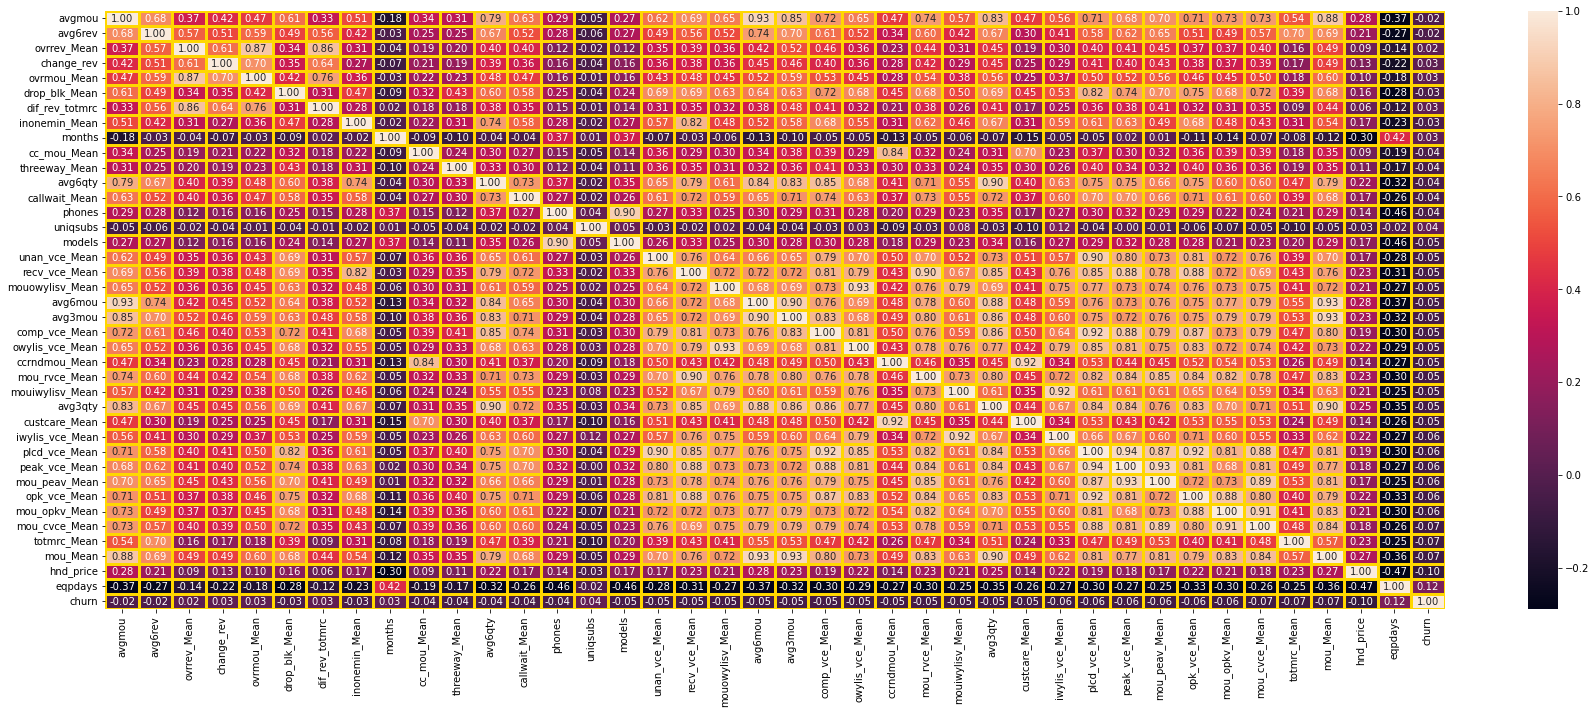

In [44]:
plt.figure(figsize=(30,11))
sns.heatmap(df2[b].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

<AxesSubplot:>

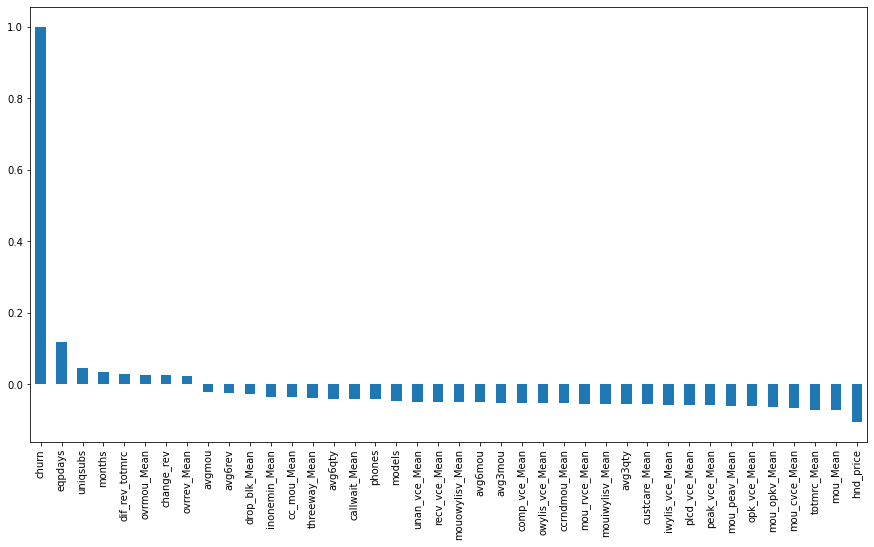

In [45]:
# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
df2[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

### モデル

In [46]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [47]:
# dependent and independent variables were determined.
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 76566
X_test 19142
y_train 76566
y_test 19142


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
        'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  num_boost_round=100,
                  early_stopping_rounds=20
                  )

# テストデータの予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 37981, number of negative: 38585
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15008
[LightGBM] [Info] Number of data points in the train set: 76566, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496056 -> initscore=-0.015778
[LightGBM] [Info] Start training from score -0.015778
[1]	valid_0's auc: 0.632673
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.633654
[3]	valid_0's auc: 0.633658
[4]	valid_0's auc: 0.636323
[5]	valid_0's auc: 0.636843
[6]	valid_0's auc: 0.638505
[7]	valid_0's auc: 0.638746
[8]	valid_0's auc: 0.639167
[9]	valid_0's auc: 0.640518
[10]	valid_0's auc: 0.640715
[11]	valid_0's auc: 0.641024
[12]	valid_0's auc: 0.642166
[13]	valid_0's auc: 0.6424
[14]	valid

In [52]:
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state),
             lgb.LGBMClassifier(random_state = random_state)]

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

lgbm_params = {'n_estimators': [100, 500, 1000],
                'subsample': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.1,0.01,0.02],
                "min_child_samples": [5,10,20]}

classifier_param = [rf_param_grid,                   
                   lgbm_params]

In [53]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "RandomForestClassifier","LGBMClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")